# Valuation Analysis - Overbought - Oversold with Z-score

### Diving into Z-Scores
Z-Scores provide a measure of how far away a particular data point is from the mean, in terms of standard deviations. In trading, this can help us understand if a stock’s current price is statistically “normal” or if it’s an outlier.

Imagine a bell curve representing a normal distribution. Most stock prices (assuming they are normally distributed, which is a big assumption and often not the case in real-life trading) will lie near the middle. Those that lie in the tails, beyond a certain Z-Score (like 1.5 or -1.5), are the ones that pique our interest.


By analyzing stock prices through the lens of Z-Scores, traders can identify potential buy/sell opportunities. A Z-Score significantly higher than 1.5 might indicate that the stock is overpriced compared to its historical average, whereas a Z-Score significantly lower than -1.5 might indicate the opposite.

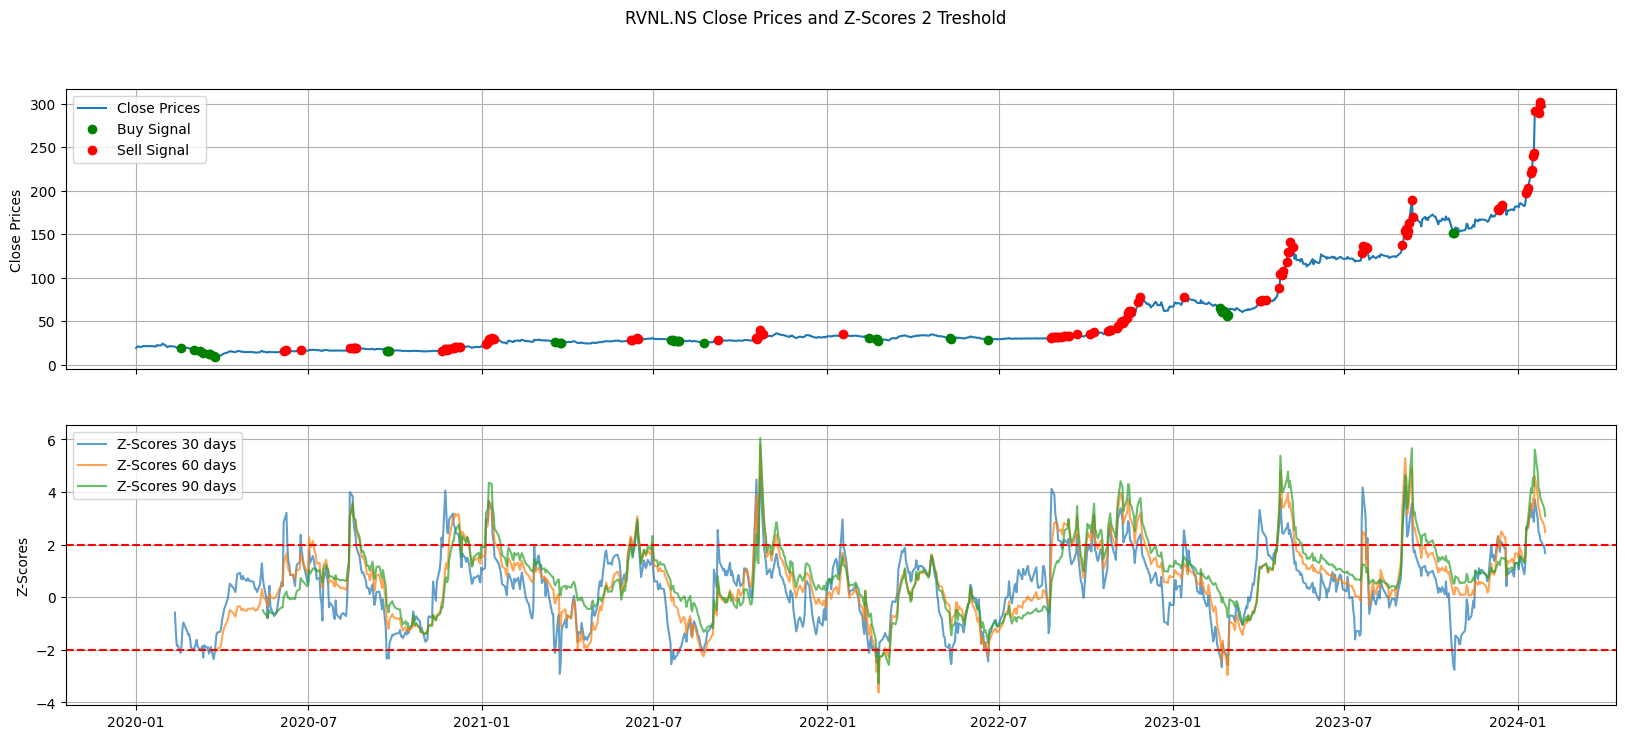

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Constants
Z_THRESH = 2
PERIODS = [30, 60, 90]
TICKER_SYMBOL = "RVNL.NS"
START_DATE = '2020-01-01'
END_DATE = '2024-01-31'


def fetch_data(ticker_symbol, start_date, end_date):
    """Fetches historical data for a given ticker symbol."""
    ticker_data = yf.Ticker(ticker_symbol)
    return ticker_data.history(period='1d', start=start_date, end=end_date)

def calculate_z_scores(close_prices, periods):
    """Calculates Z-scores for given periods."""
    z_scores_dict = {}
    for period in periods:
        # Calculate the rolling mean for the given period
        rolling_mean = close_prices.rolling(window=period).mean()      
        # Calculate the rolling standard deviation for the given period
        rolling_std = close_prices.rolling(window=period).std()       
        # Compute the Z-scores for the close prices
        z_scores = (close_prices - rolling_mean) / rolling_std      
        # Store the Z-scores in the dictionary with the period as the key
        z_scores_dict[period] = z_scores
    return z_scores_dict

def plot_data(close_prices, z_scores_data):
    """Plots close prices and z-scores."""   
    
    # Create subplots for close prices and Z-scores
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20, 8))   
    
    # Plot the close prices on the first subplot
    ax1.plot(close_prices.index, close_prices, label='Close Prices')
    for period, z_scores in z_scores_data.items():
        # Plot the Z-scores on the second subplot for each period
        ax2.plot(z_scores.index, z_scores, label=f'Z-Scores {period} days', alpha=0.7)       
        # If the period is the first in the list, plot buy/sell signals on the first subplot
        if period == PERIODS[0]:
            buy_signals = (z_scores < -Z_THRESH)
            sell_signals = (z_scores > Z_THRESH)
            ax1.plot(close_prices[buy_signals].index, close_prices[buy_signals], 'o', color='g', label='Buy Signal')
            ax1.plot(close_prices[sell_signals].index, close_prices[sell_signals], 'o', color='r', label='Sell Signal')
    # Set the y-label and legend for the close prices subplot
    ax1.set_ylabel('Close Prices')
    ax1.legend(loc="upper left")
    ax1.grid(True)
    
    # Draw horizontal lines indicating the Z-score thresholds on the Z-scores subplot
    ax2.axhline(-Z_THRESH, color='red', linestyle='--')
    ax2.axhline(Z_THRESH, color='red', linestyle='--')   
    # Set the y-label and legend for the Z-scores subplot
    ax2.set_ylabel('Z-Scores')
    ax2.legend(loc="upper left")
    ax2.grid(True)

    # Set the main title for the entire plot
    plt.suptitle(f'{TICKER_SYMBOL} Close Prices and Z-Scores {Z_THRESH} Treshold')
    # Display the plots
    plt.show()

# Fetch the historical data for the ticker symbol
ticker_data = fetch_data(TICKER_SYMBOL, START_DATE, END_DATE)

# Calculate Z-scores for the specified periods
z_scores_data = calculate_z_scores(ticker_data['Close'], PERIODS)

# Plot the close prices and Z-scores
plot_data(ticker_data['Close'], z_scores_data)
